In [4]:
#from IPython.core.display import SVG, HTML

[Capacity](#Capacity) <!-- cross-reference: replace spaces/special chars with hyphens -->
<font color=blue|red|green|pink|yellow>Text</font> 
<div class="alert alert-block alert-danger"><b>Hi:</b> Here's some text.</div>
<!-- replace alert-xxxx with alert-info for blue box (tips & notes), alert-warning for yellow (examples, equations), alert-success for green (sectional summaries & similar), alert-danger for red (serious warnings/issues; use sparingly) -->
<span class="badge badge-secondary">New</span>

<div class="jumbotron jumbotron-fluid">
  <div class="container">
    <h1 class="display-4">Machine Learning</h1>
    <h2 class="display-4">Introduction: Part I</h1>
  </div>
</div>

Start with some appetizers. 
- Detectron.
- GANs.
- VAEs?

## Outline
- Focus on philosophy, principles, and overall process (mental models for thinking about ML) rather than specific methods or deeply worked examples.
- Learning
- Model capacity and generalization
- Machine learning and neuroscience
- Worked example: capacity, overfitting, underfitting, regularization, and cross-validation

## What is a machine?

<img src='./img/danger.png'>

## What is learning?
<div class="alert alert-block alert-info">
    <b>Improving <i>performance</i> (P) on some class of <i>tasks</i> (T) given <i>experience</i> (E).</b>
</div>

- a process of _optimization_.

<img src='./img/learning-1.svg' style='width: 50%;'/>

<div class="alert alert-block alert-warning">
    "the process of learning itself is not the task"
</div>

However, it's also easy to compare ML systems to human brains. But how can we interpret brains in terms of Fig 1?

<img src='./img/learning-2.svg' style='width: 50%;'/>

A useful metaphor, if you don't have a strong intuition for what "model" means. 

<img src='./img/learning-3.svg' style='width: 50%;'/>

<img src='./img/learning-3b.svg' style='width: 50%;'/>

- This is still a huge oversimplification. 
- At best, it can apply for a single instant in time, the smallest of decisions. 
- Our brains make predictions within predictions; not only predictions about grabbing the current blueberry, but about the value of blueberry picking as an activity, about my arm getting tired... [think of better examples]
- What is "everything else"? Where do we draw the boundary? Cortex vs brain stem vs spinal cord vs... The muscle is "everything else", on a short time scale. 
- Really, the brain and body are a complicated tangle of such reciprocal relationships between parts, all balancing to produce complex behaviour that achieves, in general, something that looks like the preceding diagrams: at each level, predictions are more or less successful enough to satisfy certain constraints (evolutionary or designed).

You can mostly stick to this figure for now, and most ML models are simple enough or have well-defined inputs and outputs, and the "model" can be treated as a mathematical function or set of functions.
However, the state of the art in ML is largely about learning to learn (or meta-learning).

<img src='./img/learning-1.svg' style='width: 50%;'/>

<img src='./img/learning-4.svg' style='width: 50%;'/>

Maybe change the one below slightly: interested in how the output AND input are used to decide how to update the system. Doesn't need to look like "all movement immediately alters the environment" (model can be more abstract without being simplistic.)

<img src='./img/learning-6.svg' style='width: 50%;'/>

### ML vs statistics
- Procedures/"statistics" vs. optimization
- Human decisions: in the past (e.g. which statistics to use) vs. deferred in the present (e.g. which learning assumptions to make)
- Simpler vs. more complex ML models?
  - Deep learning: automatically find structure given high-level constraints, instead of assuming which statistics are relevant

## What is learning?
<div class="alert alert-block alert-info">
    <b>Improving <i>performance</i> (P) on some class of <i>tasks</i> (T) given <i>experience</i> (E).</b>
</div>

## The task, $T$
<div class="alert alert-block alert-warning">
    What is the system learning to do? 
</div>

Robot tasks:

- Walking
- Holding a cup
- Avoiding an obstacle

## The task, $T$

ML systems processing *examples* composed of _features_
  - Typically vectors $\mathbf{x}\in\mathbb{R}^n$ with $n$ features
\begin{equation*}
f:\mathbb{R}^n\rightarrow ?
\end{equation*}

### Classification
<div class="alert alert-block alert-info">
Which of $k$ categories does an input belong to?
<br><br>
\begin{equation*}
f:\mathbb{R}^n\rightarrow\{1,\dots,k\}
\end{equation*}
</div>

- May also output distribution over classes
- Missing values (learn *set* of functions)
- Anomaly detection (e.g. spam, credit card fraud)

<img src='./img/MNIST.jpg'>
(Liu *et al.*, 2003)
- What it *doesn't* do: understand numbers or math. Only shapes. This is all it learns, to satisfy its constraints.

### Classification
Example: CNN architecture. 
Explanation: constrain with simple principle (location invariance: convolutions) but don't impose a human-decided set of calculations.

### Classification in neuroscience
- Classify neuron type from electrophysiology data
- Classify disease state from neuroimaging data (e.g. tumour in structural MRI)
- Predict class (e.g. "currently reaching" vs. "resting") from brain measurements

<img src='./img/astrocytes.webp'>
(Suleymanova *et al.*, 2018)

<img src='./img/gcn.png'>
(Arslan *et al.*, 2018)

### Regression
<div class="alert alert-block alert-info">
What value (of some quantity) is associated with a given input?
<br><br>
\begin{equation*}
f:\mathbb{R}^n\rightarrow\mathbb{R}
\end{equation*}
</div>

Examples:    
  - Linear regression
  - Neuroscience:    
    - Predict *level*/*quantity*: firing rate, survival time, gene expression

### Structured output
- Output is a vector or some other structure with relationships between members.
- Technically subsumes all other mapping tasks.
- Examples:
  - Partition of input (e.g. superpixels)
  - Image captioning (sentence describing image)
  - Parsing sentences into a tree describing grammatical structure

The Deep Learning book gives a bunch of other examples...

### Transcription, translation
- Transcription: Observe a relatively unstructured representation and transcribe into discrete, textual form. 
  - e.g. OCR, speech recognition
- Translation: Sequence of symbols in one language to sequence of symbols in another language.

<img src='./img/translation.png'>
(Cho, 2015)

### Synthesis and sampling
- Output is a newly generated example that is *similar* to the training data.
- Like structured output, but without a single correct output for each (implicit distribution).
- Examples
  - Generate audio for given sentence
  
## GAN example

### Missing value imputation
- $\mathbf{x}\in\mathbb{R}^n$ with some $x_i$ missing
- Compare to sampling (partial).

### Denoising
- Predict clean example $\mathbf{x}\in\mathbb{R}^n$ given a corrupted example $\tilde{\mathbf{x}}\in\mathbb{R}^n$.
- Unknown corruption process; i.e. learn $p(\mathbf{x}|\tilde{\mathbf{x}})$

<img src='./img/denoising.png'>
(Lehtinen <i>et al.</i>, 2018)

### Probability mass/density estimation
- Implicitly subsumes other tasks
  - once we have explicitly obtained $p(\mathbf{x})$ we can perform the other tasks as well (e.g. missing value imputation).
  - e.g. a generative model that produces samples, and half the samples it produces belong in a certain category A; implicitly, the behaviour of the model says p(A)=0.5
- $p_\mathrm{model}:\mathbb{R}^n\rightarrow\mathbb{R}$

<img src='./img/simplex.svg' style='width: 25%;'/>
(Cho, 2015)

## The performance measure, $P$
<div class="alert alert-block alert-warning">
    How do we quantify how well the system is performing the task?
</div>


- Quantitative
- Task-specific
- Choice not obvious <!-- penalize frequent small mistakes or infrequent large mistakes? Global vs. local errors? -->
- Accuracy and error rate (expected 0-1 loss)

## The experience, $E$
- Datasets: collections of many examples/data points
- Design matrix
  - e.g. $\mathit{\mathbf{X}}\in\mathbb{R}^{150\times4}$ for irises (150 examples, 4 features). $X_{i,1}$ is the sepal length of plant $i$.
  - Not always possibly; some data (e.g. images of different sizes) are heterogeneous and are described as sets instead of matrices: $\{\mathbf{x}^{(1)},\mathbf{x}^{(2)},\dots,\mathbf{x}^{(m)}\}$


### Unsupervised learning
- Experience a dataset with many features and learn useful structural properties
- Typically want to learn the entire probability distribution that generated the dataset (explicitly or not)
- Learn $p(\mathbf{x})$ from $\mathbf{x}$ examples.
- e.g. clustering: model learns to produce a partitioning that transforms the input according to certain principles embodied by the model and the learning method.

### Unsupervised learning: Clustering

### Supervised learning
- Each example experienced is associated with a label or target.
  - Labels may be simple numbers (e.g. class numbers) or more complex (e.g. correctly transcribed sentence).
- Learn $p(\mathbf{y}|\mathbf{x})$ from $(\mathbf{x},\mathbf{y})$ examples.

<img src='./img/supervised.svg'>

### Supervised vs. unsupervised
- Given the chain rule, an unsupervised problem may be decomposed into $n$ supervised problems: 
$$p(\mathbf{x})=\prod_{i=1}^{n}p(\mathrm{x}_i|\mathrm{x}_1,\dots,\mathrm{x}_{i-1})$$
- By the definition of the conditional density, a supervised problem may be solved by unsupervised learning of the joint distribution:
$$p(y|\mathbf{x})=\frac{p(\mathbf{x},y)}{\sum_{y^\prime}p(\mathbf{x},y^\prime)}$$
- In any case, these terms help to roughly categorize problems. Traditionally, regression, classification, and structured output are considered supervised; density estimation is considered unsupervised.

### Other paradigms
- Semi-supervised (only some example labelled)
- Multi-instance (entire collections of examples labelled)
- Reinforcement learning (environment; feedback between learning system and experiences)

## What is learning?


It's not obvious what these things are, though you might think of specific examples. 
Let's start from the bottom up, from first principles of learning to more complex ones.

### Evolution
  - Process of optimization
    - Chemical thermodynamics, metastability
  - Chemical to cellular to multicellular to nervous
  - Evolutionary algorithms
  <img src='./img/chem_evolution.jpg'>
  (Kitadai & Maruyama, 2018)

### Correlational learning
  - System does not reflect on causality.
  - Often stereotyped/predictable responses.
  - Circadian entrainment
  - Single neuron? PFC damage example?

### Correlation learning
#### Kalman filter
<img src='./img/KalmanFilter.png'>
([Modelica Buildings Library](https://simulationresearch.lbl.gov/modelica/))

### Causal learning
  - Structure and abstractions
  - Planning and design
  <img src='./img/causal.jpg'>
  (Braun <i>et al.</i>, 2009)

### Reinforcement learning
  - Structured expectations.
  - What outcomes are being considered? How is performance being "measured"?
    - Humans: evolutionary and social (mostly para-evolutionary?) 

## Generalization
- How does a model perform on previously unseen inputs?
  - Example: Different coloured cat than in training examples.
- Training error vs. test/generalization error
- Difficulty: only get to observe training set (?).
- Data generating process: Assumption that training and test examples are identically distributed, and individual examples are independent of each other --> allows the generating process to be modeled as a distribution over a single example.
  - Refer to shared underlying distribution as *data generating distribution* or $p_\mathrm{data}$

### Underfitting and overfitting
1. Make the training error small
2. Make the gap between training and test error small.

### Capacity
- Ability of a model to fit a wide variety of functions. 
- Often controlled by choosing the *hypothesis space* of functions the learning algorithm can select as solutions.
- Representational capacity (i.e. how well the chosen class of functions could solve the problem) vs. effective capacity (i.e. given additional limitations, such as imperfection of optimization process, how well can chosen method solve the problem? upper bound is representational capacity).
- Often considered in terms of number of parameters... but not all parameters are equal (VC dimension: "the largest possible value of $m$ for which there exists a training set of $m$ different examples that the classifier can label arbitrarily").
- Too high: overfitting. Too low: underfitting. Figure 5.2.
- Statistical learning theory: Gap between training and generalization error is bounded above by a quantity that grows with capacity, but shrinks with number of training examples.
  - Simpler functions more likely to generalize, but must still choose a sufficiently complex hypothesis to achieve low training error.
- Performance is typically best when model capacity is appropriate for the complexity of the task and the number of available examples.
- Example:
  - Quadratic has higher capacity than linear.
  - Pathological example (single-parameter universal approximator).
- Ideal model: Oracle that knows the true distribution.
  - May still make errors; e.g. due to noise inherent to generating distribution, or due to excluded variables involved in the deterministic relationship between $\mathbf{x}$ and $y$.
  - *Bayes error*: error incurred by an oracle. That is, the lower bound on the error.

### Capacity
#### "Number of parameters"
$$f_\theta(x)=\sin^2\left(2^{rx}\arcsin\sqrt{\theta}\right)$$
<img src='./img/single-param.png'>
(Piantadosi, 2018)

#### Non-parametric models
- Limit of infinite capacity; no parametrized function fixed prior to learning.
- Example: 
  - Nearest neighbour regression.
  - Wrap parametric learning algorithm inside another algorithm that optimizes no. of parameters as needed.

#### No Free Lunch theorem
"averaged over all possible data generating distributions, every classification algorithm has the same error rate when classifying previously unobserved points"
i.e. we need to make assumptions about which data generating distributions are relevant

- the world is not composed of all possible data generating distributions; this theorem's relevance has to do with uncertainty and counterfactuals

### Regularization
- Any modification to learning algorithm intended to reduce generalization error but not training error.
- Additional preferences/penalties about the hypothesis space, above simple inclusion/exclusion.
- e.g. weight decay, $J(\mathbf{w})=\mathrm{MSE_{train}}+\lambda\mathbf{w}^\top\mathbf{w}$

### Hyperparameters
- Learning algorithm settings; not adapted by learning algorithm itself
- e.g. the degree of the polynomial in polynomial regression; $\lambda$ for weight decay
- Can't optimize on training set; would always optimize for higher capacity
  - Need a *validation set* (**not** overlapping with test set)
  - Split training set into 80%/20% training/validation
  

### Cross-validation
- Split dataset into $k$ non-overlapping subsets
- $k$ trials; on trial $i$, use $i$-th subset as test set and remainder as training set. Overall test error is average of trial test errors.
- Unfortunately there are no unbiased estimators of the variance of such average error estimators.

### Point estimators
i.e. "statistics"
- What is the "best" prediction for a quantity of interest? (a number or vector)
  - e.g. weights in linear regression
- Any function of i.i.d. data points $\{\mathbf{x}^{(1)},\dots,\mathbf{x}^{(m)}\}$: $$\hat{\mathbf{\theta}}_m=g\left(\mathbf{x}^{(1)},\dots,\mathbf{x}^{(m)}\right)$$
- Good estimator has $\hat{\mathbf{\theta}}$ close to underlying $\mathbf{\theta}$
- Frequentist perspective: true value $\mathbf{\theta}$ is fixed but unknown, and $\hat{\mathbf{\theta}}$ is function of the data; as the data is drawn from a random process, $\hat{\mathbf{\theta}}$ is a random variable.
- Note: function estimation: approximate some function $f$ with a model or estimate $\hat{f}$; this is fundamentally the same as parameter estimation, except the point estimate is in function space.

#### Bias
$$\mathrm{bias}\left(\hat{\mathbf{\theta}}_m\right)=\mathbb{E}\left(\hat{\mathbf{\theta}}_m\right)-\mathbf{\theta}$$
- Expectation over the data.
- Unbiased: $\mathrm{bias}=0$, i.e. $\mathbb{E}(\hat{\mathbf{\theta}}_m)=\mathbf{\theta}$
  - Asymptotically unbiased if $\lim_{m\rightarrow\infty}\mathrm{bias}(\hat{\mathbf{\theta}}_m)$
e.g. Bernoulli distribution, Guassian mean (see book)

#### Variance
$$\mathrm{Var}(\hat\theta)$$
- Square root of variance: standard error, $\mathrm{SE}(\hat{\theta})$
- Expected variation in estimate as we independently resample the dataset.


#### Bias-variance tradeoff
\begin{align*}
\mathrm{MSE}&=\mathbb{E}\left[(\hat{\theta}_m-\theta)^2\right] \\
            &=\mathrm{Bias}(\hat{\theta}_m)^2+\mathrm{Var}(\hat{\theta}_m)
\end{align*}
- Figure 5.6
- Typically use cross-validation; may also compare MSE directly
  - MSE: Overall expected deviation
  - Increasing capacity tends to increase variance and decrease bias
  - Small MSE: estimator keeping both bias and variance somewhat in check

### Disentangling
- Factors of variation (e.g. PCA limitations)
- Invariance and symmetry?
- Separability vs. representation (e.g. polar vs cartesian)
- Another example: brain disentangling object state from illumination, perspective

<img src='./img/pca_vs_vae-1.png'>
(Hinton & Salakhutdinov, 2006)

<img src='./img/pca_vs_vae-2.png'>
(Hinton & Salakhutdinov, 2006)

## "What makes a good model"
Get a list (CoSMo paper?) and see if I can improve integration of the slides with these ideas.

## Deep learning and neuroscience
<img src='./img/deep_neuro.jpg'>
(Yamins & DiCarlo, 2016)

## Summary
- Be careful what assumptions you make, and what you *provide* for your models:
  - Inputs: structure, processing/calculations/statistics 
  - Functional capacity
  - Regularization or other constraints to improve generalization
  - Resource capacity
  - "Overfitting by grad student"
- Focus on learning to balance capacity, amount of available data/examples, with the use of 
  - test sets
  - cross-validation
  - regularization
- Think about how models are composed from parts

## Demo

In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
def quadratic(x, loc=0., scale=1.):
    return scale * (x - loc)**2

By fixing the parameters of this function, we can define `gen_func` and refer to it as such later; this preserves the generality of the code that follows, and also the generality of the quadratic function.

In [73]:
from functools import partial

# a little trick to fix the parameters of this function
gen_func = partial(quadratic, loc=0.5, scale=-1.)

In [104]:
N = 350  # number of examples
noise_scale = 0.025  # SD of Gaussian noise added to generating distribution

# uniformly sample across example domain
x = np.random.uniform(low=0.0, high=1.0, size=N)

# take value of generating function at sampled locations
# & corrupt with Gaussian noise
noise = np.random.normal(loc=0.0, scale=noise_scale, size=N)
y = gen_func(x) + noise

In [105]:
# sample the (uncorrupted) generating function on a regular grid, for plotting
x_grid = np.linspace(0, 1, 100)
y_true = gen_func(x_grid)

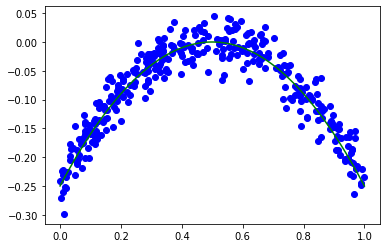

In [106]:
plt.plot(x, y, 'bo')
plt.plot(x_grid, true_func, 'g-')
xlim = plt.xlim()  # keep limits for plots to follow
ylim = plt.ylim()
plt.show()

In [107]:
from sklearn import linear_model

In [108]:
def add_poly_terms(x, order=2):
    X = np.zeros((x.shape[0], order))
    X[:, 0] = np.copy(x)
    for col in range(1, order):
        X[:, col] = x ** (col + 1)
    return X

In [109]:
order = 2
X = add_poly_terms(x, order)

reg = linear_model.LinearRegression().fit(X, y)
score = reg.score(X, y)
y_reg = reg.predict(add_poly_terms(x_grid, order))

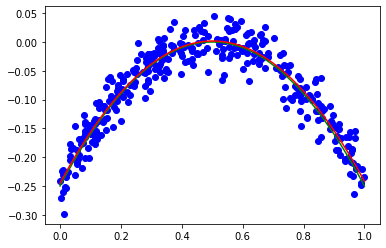

In [110]:
plt.plot(x, y, 'bo')
plt.plot(x_grid, true_func, 'g-')
plt.plot(x_grid, y_reg, 'r-')
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

(-0.3157234808940951, 0.061854306601706516)

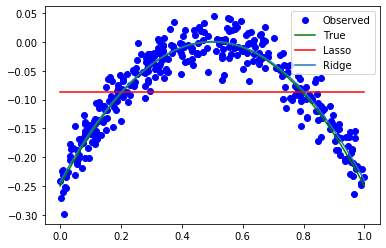

In [112]:
order = 2
X = add_poly_terms(x, order)
reg_lasso = linear_model.Lasso(alpha=0.01).fit(X, y)
reg_ridge = linear_model.Ridge(alpha=0.01).fit(X, y)
y_lasso = reg_lasso.predict(add_poly_terms(x_grid, order))
y_ridge = reg_ridge.predict(add_poly_terms(x_grid, order))

plt.plot(x, y, 'bo')
plt.plot(x_grid, true_func, 'g-')
plt.plot(x_grid, y_lasso, 'r-')
plt.plot(x_grid, y_ridge, '-')
plt.legend(['Observed','True','Lasso','Ridge'])
plt.xlim(xlim)
plt.ylim(ylim)